In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sympy as smp
import numba
from numba import jit

In [37]:
x,y=smp.symbols('x y')
p=smp.sin(x*smp.pi/2/a)*smp.sin(y*smp.pi/2/b)
P=smp.lambdify([x,y],p)

In [38]:
a=10
b=10
x1=np.linspace(0,a,300)
y1=np.linspace(0,b,300)

In [39]:
xv, yv = np.meshgrid(x1, y1)
M=P(xv,yv)

In [40]:
@numba.jit("f8[:,:](f8[:,:], i8)", nopython=True, nogil=True)
def compute_potential(potential, n_iter):
    length = len(potential[0])
    for n in range(n_iter):
        for i in range(1, length-1):
            for j in range(1, length-1):
                potential[j][i] = 1/4 * (potential[j+1][i] + potential[j-1][i] + potential[j][i+1] + potential[j][i-1])
    return potential

In [53]:
m= np.ones((300,300))
m=P(xv,yv)*m
m[0,:]= 10
m[-1,:]= 0
m[:,0]= 0
m[:,-1]= 0
m = compute_potential(m, n_iter=50000)

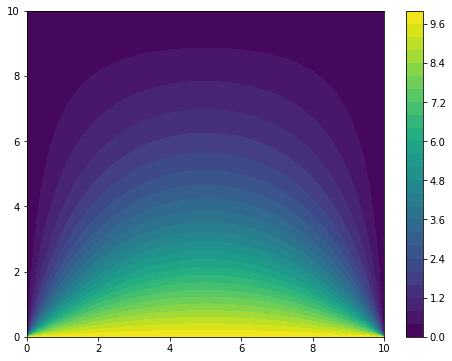

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
clr_plot = ax.contourf(xv, yv, m, 30)
fig.colorbar(clr_plot)

In [61]:
w= np.ones((300,300))
w=P(xv,yv)*m
w[0,:]= 0
w[-1,:]= 0.2
w[:,0]= 0
w[:,-1]= 0
w = compute_potential(w, n_iter=20000)

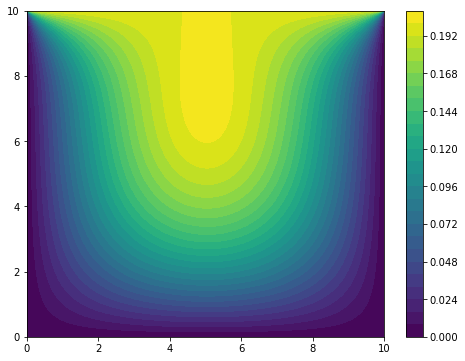

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
clr_plot = ax.contourf(xv, yv, w, 30)
fig.colorbar(clr_plot)